# Sandip Shaw

## Machine Learning Short Assignment 

### Goal : To create a python notebook (jupyter) and predict value of variable (target) for next 6 quarters using Pycaret package 

In [397]:
import pandas as pd

In [398]:
# To view every Rows

pd.set_option('display.max_rows',None)

In [399]:
# Read CSV file

df = pd.read_csv('fred_quarterly.csv')
df.head()

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [400]:
df.tail()

,date,month,quarter,Target,gnp,gdpdef,gdp
81,4/1/2020,2020-04,2020Q2,17258.205,19649.442,112.859,19477.444
82,7/1/2020,2020-07,2020Q3,18560.774,21365.412,113.888,21138.574
83,10/1/2020,2020-10,2020Q4,18767.778,21728.223,114.439,21477.597
84,1/1/2021,2021-01,2021Q1,19055.655,22273.060,115.652,22038.226
85,4/1/2021,2021-04,2021Q2,19358.176,NaN,117.380,22722.581


In [401]:
df.shape

(86, 7)

In [402]:
# Checking for Null Values

df.isnull().sum()

date       0
month      0
quarter    0
Target     0
gnp        1
gdpdef     0
gdp        0
dtype: int64

In [403]:
# Removing the only record with null value

new_df = df.dropna()
new_df.tail()

,date,month,quarter,Target,gnp,gdpdef,gdp
80,1/1/2020,2020-01,2020Q1,18951.992,21721.267,113.346,21481.367
81,4/1/2020,2020-04,2020Q2,17258.205,19649.442,112.859,19477.444
82,7/1/2020,2020-07,2020Q3,18560.774,21365.412,113.888,21138.574
83,10/1/2020,2020-10,2020Q4,18767.778,21728.223,114.439,21477.597
84,1/1/2021,2021-01,2021Q1,19055.655,22273.060,115.652,22038.226


In [404]:
# Information about the dataframe

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     85 non-null     object 
 1   month    85 non-null     object 
 2   quarter  85 non-null     object 
 3   Target   85 non-null     float64
 4   gnp      85 non-null     float64
 5   gdpdef   85 non-null     float64
 6   gdp      85 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.3+ KB


In [405]:
# Descriptive Statistics

new_df.describe()

,Target,gnp,gdpdef,gdp
count,85.000000,85.000000,85.000000,85.000000
mean,16004.373588,15788.494200,96.428376,15623.196224
std,1783.895977,3545.817776,10.988086,3464.689691
min,12935.252000,10035.263000,77.325000,10002.179000
25%,14839.707000,12996.998000,87.082000,12922.656000
50%,15769.911000,15339.711000,96.282000,15141.605000
75%,17437.080000,18565.145000,104.979000,18332.079000
max,19202.310000,22273.060000,115.652000,22038.226000


In [406]:
new_df['quarter'].value_counts().sum()

85

In [407]:
cols = new_df.columns
cols

Index(['date', 'month', 'quarter', 'Target', 'gnp', 'gdpdef', 'gdp'], dtype='object')

In [408]:
# Checking for Unique Values

for i in range(len(new_df)):
    print('Unique Values in ',cols[i])
    print(new_df[cols[i]].value_counts().sum())

Unique Values in  date
85
Unique Values in  month
85
Unique Values in  quarter
85
Unique Values in  Target
85
Unique Values in  gnp
85
Unique Values in  gdpdef
85
Unique Values in  gdp
85


IndexError: index 7 is out of bounds for axis 0 with size 7

In [409]:
# Removing the Year Value from the quarters

new_df['quarter'] = new_df['quarter'].str[4:]
new_df.head()

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,Q1,13219.251,10510.297,79.204,10470.231


In [448]:
# Removing the date and month variable as they have no correlation with the target

new_df1 = new_df.drop(['date','month'],axis=1)
new_df1.head()

,quarter,Target,gnp,gdpdef,gdp
0,Q1,12935.252,10035.263,77.325,10002.179
1,Q2,13170.749,10283.391,77.807,10247.720
2,Q3,13183.890,10348.645,78.263,10318.165
3,Q4,13262.250,10490.430,78.688,10435.744
4,Q1,13219.251,10510.297,79.204,10470.231


### According to the question, we need to predict values of 6 records so we split the given dataframe into 79 and 6 records into train and test dataframe

In [411]:
train_df = new_df1.iloc[:-6,:]
train_df.head()

,quarter,Target,gnp,gdpdef,gdp
0,Q1,12935.252,10035.263,77.325,10002.179
1,Q2,13170.749,10283.391,77.807,10247.720
2,Q3,13183.890,10348.645,78.263,10318.165
3,Q4,13262.250,10490.430,78.688,10435.744
4,Q1,13219.251,10510.297,79.204,10470.231


In [412]:
train_df.tail()

,quarter,Target,gnp,gdpdef,gdp
74,Q3,18679.599,20930.650,110.597,20659.102
75,Q4,18721.281,21101.077,111.175,20813.325
76,Q1,18833.195,21254.334,111.514,21001.591
77,Q2,18982.528,21564.924,112.152,21289.268
78,Q3,19112.653,21780.753,112.517,21505.012


In [415]:
test_df = new_df1.iloc[79:85,:]
test_df = test_df.drop(['Target'],axis=1)
test_df

,quarter,gnp,gdpdef,gdp
79,Q4,21955.980,112.978,21694.458
80,Q1,21721.267,113.346,21481.367
81,Q2,19649.442,112.859,19477.444
82,Q3,21365.412,113.888,21138.574
83,Q4,21728.223,114.439,21477.597
84,Q1,22273.060,115.652,22038.226


In [416]:
# DataFrame for Visualization

df_vis = train_df.drop(['quarter'],axis=1)
df_vis.head()

,Target,gnp,gdpdef,gdp
0,12935.252,10035.263,77.325,10002.179
1,13170.749,10283.391,77.807,10247.720
2,13183.890,10348.645,78.263,10318.165
3,13262.250,10490.430,78.688,10435.744
4,13219.251,10510.297,79.204,10470.231


## DATA VISUALIZATION 

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

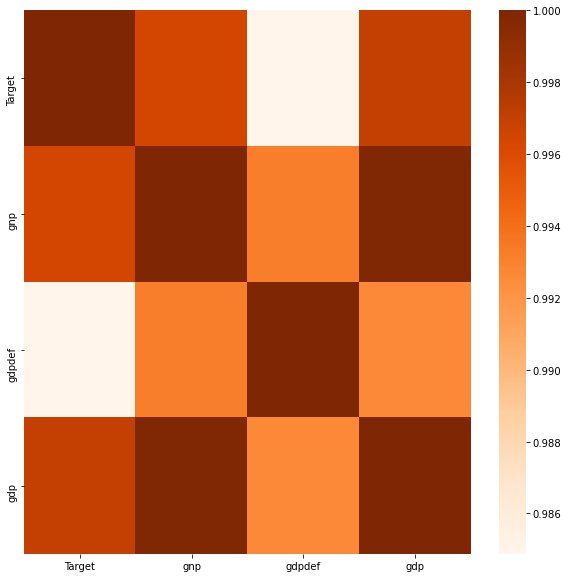

In [418]:
# heatmap using correkation matrix

plt.figure(figsize=(10,10))
sns.heatmap(df_vis.corr(),cmap='Oranges')

### There is no correlation between variables


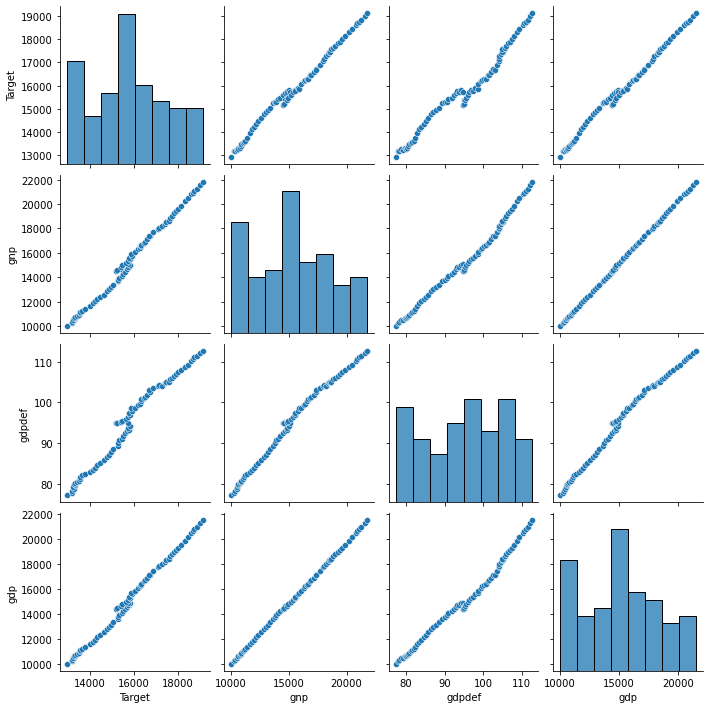

In [419]:
# PairPlot

sns.pairplot(df_vis)

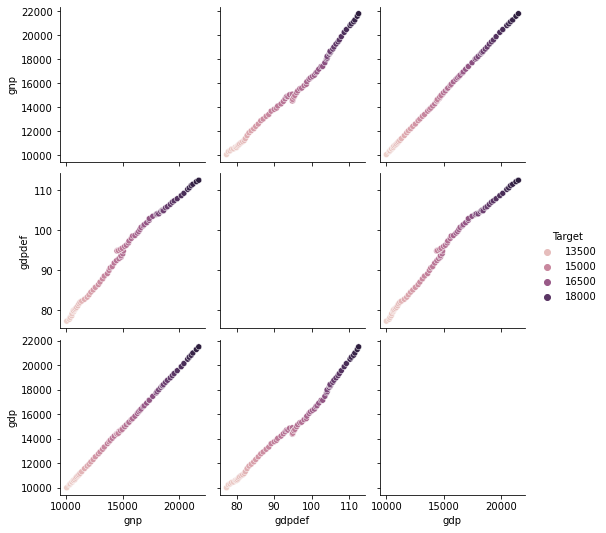

In [420]:
# Pairplot using Target as Hue

sns.pairplot(df_vis,hue='Target')

<AxesSubplot:xlabel='Target', ylabel='Count'>

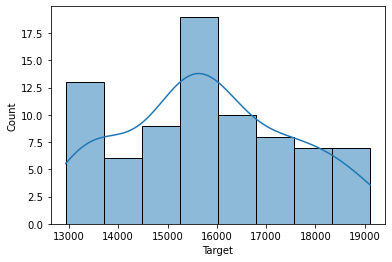

In [421]:
# histogram

sns.histplot(df_vis['Target'],kde=True)

In [422]:
train_df['quarter'].value_counts()

Q3    20
Q2    20
Q1    20
Q4    19
Name: quarter, dtype: int64

In [423]:
Q1total = train_df.loc[new_df['quarter']=='Q1','Target'].sum()
Q1total

314276.32

In [424]:
Q2total = train_df.loc[new_df['quarter']=='Q2','Target'].sum()
Q2total

316304.673

In [425]:
Q3total = train_df.loc[new_df['quarter']=='Q3','Target'].sum()
Q3total

317868.907

In [426]:
Q4total = train_df.loc[new_df['quarter']=='Q4','Target'].sum()
Q4total

300125.141

We can clearly see Quarter 1 has slightly more overall target than Q1,Q2,Q3 which has negligible difference among each other

In [427]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  79 non-null     object 
 1   Target   79 non-null     float64
 2   gnp      79 non-null     float64
 3   gdpdef   79 non-null     float64
 4   gdp      79 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.7+ KB


## One Hot Encoding (for object data type variable Quarter)

In [428]:
from sklearn.preprocessing import OneHotEncoder

In [429]:
oh_enc = OneHotEncoder(sparse=False,drop='first')

In [430]:
oh_enc_arr = oh_enc.fit_transform(train_df[['quarter']])
oh_enc_arr

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0

In [431]:
oh_enc_arr2 = oh_enc.fit_transform(test_df[['quarter']])
oh_enc_arr2

array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [432]:
dummy_df = pd.get_dummies(train_df)
dummy_df.head()

,Target,gnp,gdpdef,gdp,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,12935.252,10035.263,77.325,10002.179,1,0,0,0
1,13170.749,10283.391,77.807,10247.720,0,1,0,0
2,13183.890,10348.645,78.263,10318.165,0,0,1,0
3,13262.250,10490.430,78.688,10435.744,0,0,0,1
4,13219.251,10510.297,79.204,10470.231,1,0,0,0


In [433]:
dummy_df2 = pd.get_dummies(test_df)
dummy_df2.head()

,gnp,gdpdef,gdp,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
79,21955.980,112.978,21694.458,0,0,0,1
80,21721.267,113.346,21481.367,1,0,0,0
81,19649.442,112.859,19477.444,0,1,0,0
82,21365.412,113.888,21138.574,0,0,1,0
83,21728.223,114.439,21477.597,0,0,0,1


In [434]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['quarter_Q2','quarter_Q3','quarter_Q4'])
oh_enc_df.head()

,quarter_Q2,quarter_Q3,quarter_Q4
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0


In [435]:
oh_enc_df2 = pd.DataFrame(oh_enc_arr2, columns=['quarter_Q2','quarter_Q3','quarter_Q4'])
oh_enc_df2 = oh_enc_df2.set_index([pd.Index([79,80,81,82,83,84])])
oh_enc_df2

,quarter_Q2,quarter_Q3,quarter_Q4
79,0.0,0.0,1.0
80,0.0,0.0,0.0
81,1.0,0.0,0.0
82,0.0,1.0,0.0
83,0.0,0.0,1.0
84,0.0,0.0,0.0


In [436]:
final_df = pd.DataFrame.join(train_df,oh_enc_df)
final_df.head()

,quarter,Target,gnp,gdpdef,gdp,quarter_Q2,quarter_Q3,quarter_Q4
0,Q1,12935.252,10035.263,77.325,10002.179,0.0,0.0,0.0
1,Q2,13170.749,10283.391,77.807,10247.720,1.0,0.0,0.0
2,Q3,13183.890,10348.645,78.263,10318.165,0.0,1.0,0.0
3,Q4,13262.250,10490.430,78.688,10435.744,0.0,0.0,1.0
4,Q1,13219.251,10510.297,79.204,10470.231,0.0,0.0,0.0


In [437]:
final_test_df = pd.DataFrame.join(test_df,oh_enc_df2)
final_test_df

,quarter,gnp,gdpdef,gdp,quarter_Q2,quarter_Q3,quarter_Q4
79,Q4,21955.980,112.978,21694.458,0.0,0.0,1.0
80,Q1,21721.267,113.346,21481.367,0.0,0.0,0.0
81,Q2,19649.442,112.859,19477.444,1.0,0.0,0.0
82,Q3,21365.412,113.888,21138.574,0.0,1.0,0.0
83,Q4,21728.223,114.439,21477.597,0.0,0.0,1.0
84,Q1,22273.060,115.652,22038.226,0.0,0.0,0.0


In [438]:
final_df2 = final_df.drop(['quarter'],axis=1)

In [439]:
final_df2.head()

,Target,gnp,gdpdef,gdp,quarter_Q2,quarter_Q3,quarter_Q4
0,12935.252,10035.263,77.325,10002.179,0.0,0.0,0.0
1,13170.749,10283.391,77.807,10247.720,1.0,0.0,0.0
2,13183.890,10348.645,78.263,10318.165,0.0,1.0,0.0
3,13262.250,10490.430,78.688,10435.744,0.0,0.0,1.0
4,13219.251,10510.297,79.204,10470.231,0.0,0.0,0.0


In [440]:
final_df2.tail()

,Target,gnp,gdpdef,gdp,quarter_Q2,quarter_Q3,quarter_Q4
74,18679.599,20930.650,110.597,20659.102,0.0,1.0,0.0
75,18721.281,21101.077,111.175,20813.325,0.0,0.0,1.0
76,18833.195,21254.334,111.514,21001.591,0.0,0.0,0.0
77,18982.528,21564.924,112.152,21289.268,1.0,0.0,0.0
78,19112.653,21780.753,112.517,21505.012,0.0,1.0,0.0


## Using the Pycaret module

In [441]:
from pycaret.regression import *

In [442]:
clf1 = setup(data = final_df2,target = 'Target')

,Description,Value
0,session_id,6803
1,Target,Target
2,Original Data,"(79, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55, 5)"


In [443]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,71.5567,8760.8066,89.8308,0.9947,0.0057,0.0045,0.0480
gbr,Gradient Boosting Regressor,102.2238,15896.3588,117.7904,0.9917,0.0074,0.0063,0.0100
rf,Random Forest Regressor,105.9414,19831.1300,134.3705,0.9889,0.0086,0.0067,0.0600
lasso,Lasso Regression,99.9703,15758.4182,122.0238,0.9873,0.0081,0.0065,0.0100
en,Elastic Net,99.9266,15306.1354,119.8947,0.9873,0.0080,0.0065,0.0090
ridge,Ridge Regression,100.8101,16039.0647,123.1703,0.9871,0.0082,0.0066,0.0090
lr,Linear Regression,101.2651,16258.1918,124.0526,0.9869,0.0083,0.0066,0.0080
knn,K Neighbors Regressor,120.6378,23315.7740,147.3656,0.9867,0.0093,0.0076,0.0100
br,Bayesian Ridge,113.7928,19064.5348,134.3748,0.9840,0.0088,0.0073,0.0070
omp,Orthogonal Matching Pursuit,113.7280,19071.4181,134.3968,0.9840,0.0088,0.0073,0.0070


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6803, verbose=0, warm_start=False)

In [444]:
reg_model = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,86.4433,10889.1628,104.3512,0.9947,0.0065,0.0053
1,79.2245,11114.4827,105.4252,0.9947,0.0069,0.0053
2,106.1979,17838.7863,133.5619,0.9956,0.0080,0.0062
3,93.2275,10670.3854,103.2976,0.9865,0.0064,0.0058
4,94.5223,14422.8092,120.0950,0.9920,0.0078,0.0061
5,54.4537,5906.0156,76.8506,0.9976,0.0049,0.0035
6,59.5031,6391.5021,79.9469,0.9977,0.0055,0.0039
7,34.6787,2742.9991,52.3736,0.9980,0.0034,0.0023
8,49.7845,2790.9057,52.8290,0.9995,0.0036,0.0032
9,57.5311,4841.0176,69.5774,0.9906,0.0043,0.0036


In [445]:
tuned_model = tune_model(reg_model,n_iter=50,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,139.6566,29267.7141,171.0781,0.9857,0.0102,0.0084
1,160.4293,32992.8229,181.6393,0.9842,0.0123,0.0108
2,205.2593,72190.4972,268.6829,0.9820,0.0155,0.0121
3,101.8365,15291.0660,123.6570,0.9806,0.0078,0.0063
4,102.8572,20520.4055,143.2495,0.9887,0.0094,0.0068
5,105.0098,20391.0486,142.7972,0.9919,0.0094,0.0069
6,73.1939,7334.9722,85.6445,0.9974,0.0053,0.0045
7,101.7225,15593.4387,124.8737,0.9887,0.0090,0.0071
8,96.6244,11505.1033,107.2618,0.9978,0.0070,0.0061
9,89.3384,10105.7376,100.5273,0.9803,0.0064,0.0056


In [446]:
et_final = finalize_model(tuned_model)

### Predicting on the test dataframe we created earlier

In [447]:
predictions = predict_model(et_final, data = final_test_df)
predictions

,quarter,gnp,gdpdef,gdp,quarter_Q2,quarter_Q3,quarter_Q4,Label
79,Q4,21955.980,112.978,21694.458,0.0,0.0,1.0,18810.696880
80,Q1,21721.267,113.346,21481.367,0.0,0.0,0.0,18851.305584
81,Q2,19649.442,112.859,19477.444,1.0,0.0,0.0,18391.174094
82,Q3,21365.412,113.888,21138.574,0.0,1.0,0.0,18836.605891
83,Q4,21728.223,114.439,21477.597,0.0,0.0,1.0,18810.696880
84,Q1,22273.060,115.652,22038.226,0.0,0.0,0.0,18851.305584
